**Grayscale images and histogram equalization**

*Libraries:*

In [23]:
import numpy as np
from matplotlib import pyplot as plt

*Read TIFF-Grayscale Image from the Database.*

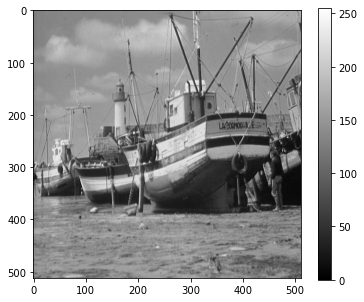

In [24]:
boat_image = plt.imread("images/boat.tiff")
plt.figure(figsize = (6,5))
plt.imshow(boat_image, cmap = "gray")
plt.colorbar()
plt.show()

This image is purely grayscale and we can see it has no third dimension:

In [25]:
print(boat_image.shape)

(512, 512)


Now a pure gray colormap is an valid option for an old photo, of course, but there are many other possible colormaps out there that can be handy for display certain information (In the case of the previous photo it is light-intensity). We all know for example the presentation for images of a infrared-camera. In the following we will see three different colormaps:

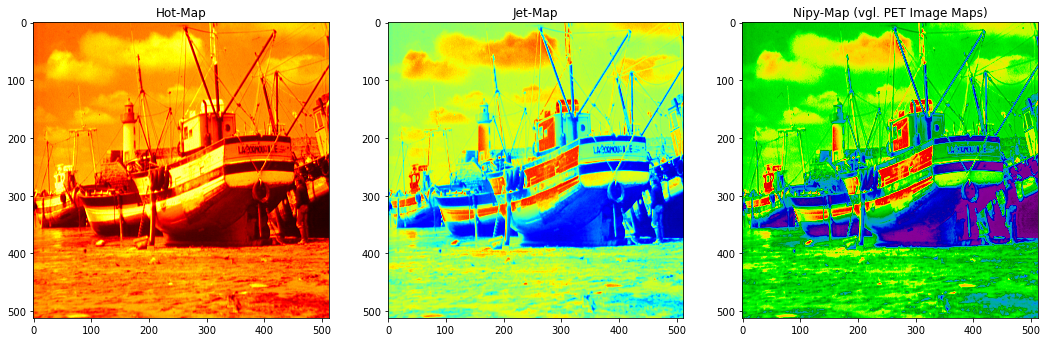

In [26]:
plt.figure(figsize = (18,6))

plt.subplot(131)
plt.title("Hot-Map")
plt.imshow(boat_image, cmap = "hot")

plt.subplot(132)
plt.title("Jet-Map")
plt.imshow(boat_image, cmap = "jet")

plt.subplot(133)
plt.title("Nipy-Map (vgl. PET Image Maps)")
plt.imshow(boat_image, cmap = "nipy_spectral")

plt.show()

**Histograms**

In [27]:
boat_image_flat = boat_image.reshape(boat_image.shape[0]*boat_image.shape[1])

*the easy way*

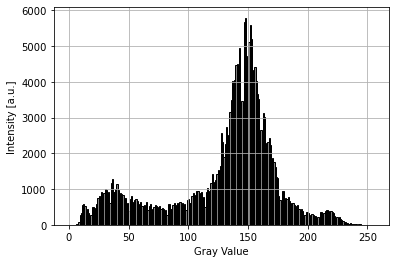

In [28]:
plt.figure()
plt.hist(boat_image_flat,bins=256,fc='gray', ec='k')
plt.xlabel("Gray Value")
plt.ylabel("Intensity [a.u.]")
plt.grid()
plt.show()

*the more flexible way*

In [29]:
_val,_bin = np.histogram(boat_image_flat,bins=256)
_val_cumsum = _val.cumsum()
_val_cumsum_norm = _val_cumsum / np.max(_val_cumsum) * 255

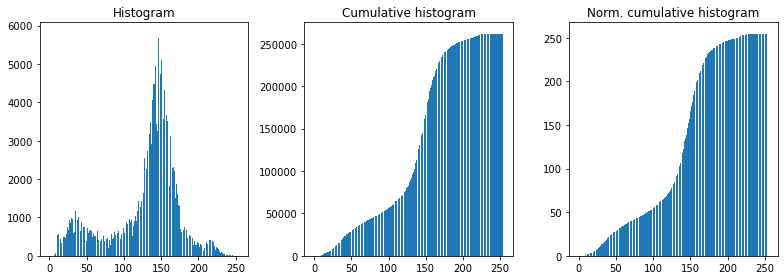

In [30]:
plt.figure(figsize=(11,4))
plt.subplot(131)
plt.title("Histogram")
plt.bar(_bin[:-1],_val)
plt.subplot(132)
plt.title("Cumulative histogram")
plt.bar(_bin[:-1],_val_cumsum)
plt.subplot(133)
plt.title("Norm. cumulative histogram")
plt.bar(_bin[:-1],_val_cumsum_norm)
plt.tight_layout()
plt.show()

*And with the normalized cumulative histogram we can do a histogram equilization of our image.*

In [31]:
eq_image_flat = _val_cumsum_norm[boat_image_flat]
eq_image = eq_image_flat.reshape(512,512)

In [32]:
_val_eq,_bin_eq = np.histogram(eq_image_flat,bins=256)
_val_cumsum_eq = _val_eq.cumsum()

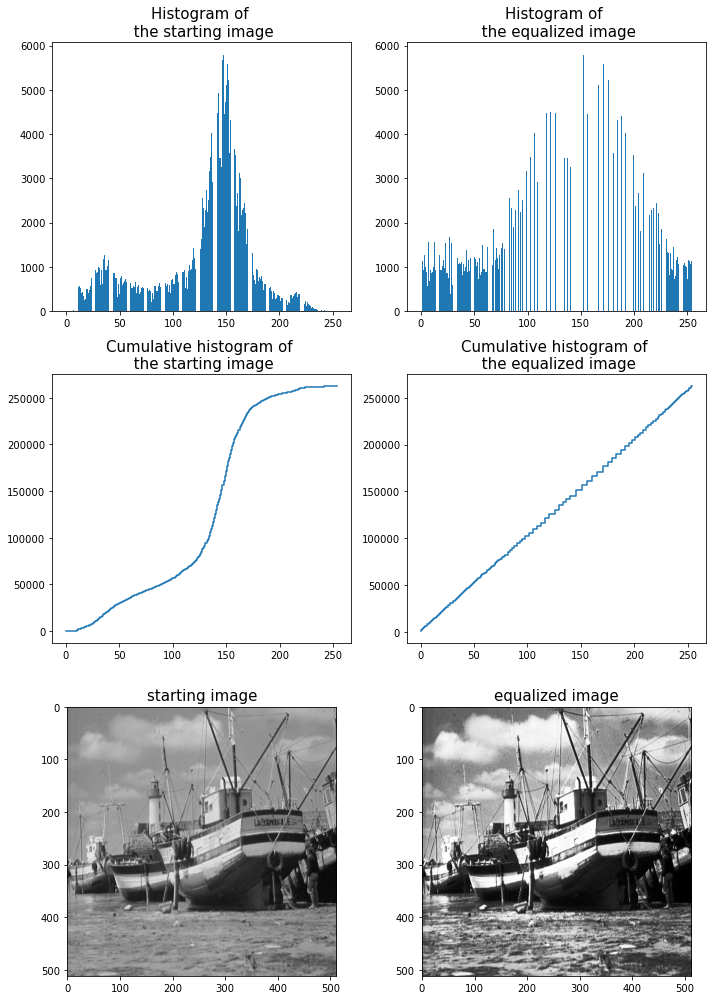

In [33]:
plt.figure(figsize=(10,14))

plt.subplot(321)
plt.title("Histogram of \n the starting image",fontsize=15)
plt.bar(_bin[:-1],_val)

plt.subplot(322)
plt.title("Histogram of \n the equalized image",fontsize=15)
plt.bar(_bin_eq[:-1],_val_eq)

plt.subplot(323)
plt.title("Cumulative histogram of \n the starting image",fontsize=15)
plt.step(_bin[:-1],_val_cumsum)

plt.subplot(324)
plt.title("Cumulative histogram of \n the equalized image",fontsize=15)
plt.step(_bin_eq[:-1],_val_cumsum_eq)

plt.subplot(325)
plt.title("starting image",fontsize=15)
plt.imshow(boat_image, cmap = "gray")

plt.subplot(326)
plt.title("equalized image",fontsize=15)
plt.imshow(eq_image,cmap="gray")

plt.tight_layout()
plt.show()